In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
#pip install mlxtend

In [27]:

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df=pd.read_excel("Superstore_USA.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [6]:
data=df[df["Order ID"].duplicated()]

In [7]:
duplicated_dates=data[data["Order Date"].duplicated(keep=False)]

In [8]:
dup=duplicated_dates[duplicated_dates["Order ID"].duplicated(keep=False)]

In [9]:
dup[dup["Order ID"]==90504]

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
9310,24529,Critical,0.08,39.48,1.99,3368,Marian Alexander,Express Air,Home Office,Technology,...,East,Ohio,Warren,44483,2012-01-11,2012-01-13,299.5842,11,434.18,90504
9311,24530,Critical,0.04,6.48,5.40,3368,Marian Alexander,Regular Air,Home Office,Office Supplies,...,East,Ohio,Warren,44483,2012-01-11,2012-01-13,-11.0236,1,11.87,90504


In [10]:
dup.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

### checking for repeatative products

In [11]:
dup[dup['Product Name']=='Executive Impressions 12" Wall Clock'][['Order ID','Product Name']]

,Order ID,Product Name
114,91579,"Executive Impressions 12"" Wall Clock"
2300,89546,"Executive Impressions 12"" Wall Clock"
5380,46565,"Executive Impressions 12"" Wall Clock"
5394,90572,"Executive Impressions 12"" Wall Clock"


In [12]:
dup[dup['Order ID']==46565][['Order ID','Product Name']]

,Order ID,Product Name
5380,46565,"Executive Impressions 12"" Wall Clock"
5381,46565,Space Solutions Commercial Steel Shelving


## visualizing most bought items

<AxesSubplot:>

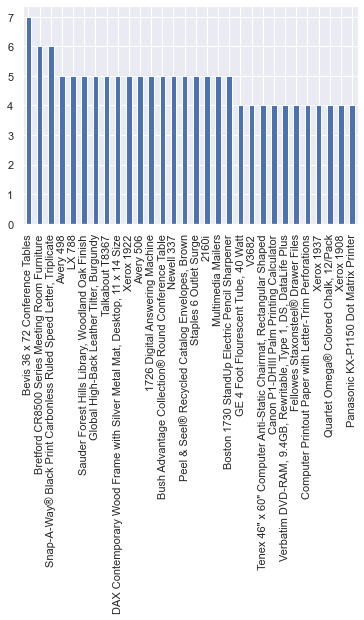

In [23]:
dup['Product Name'].value_counts()[:30].plot(kind="bar")

### 5. Analyze data with apriori rule
Apriori algorithm assumes that any subset of a frequent itemset must be frequent. Its the algorithm behind Market Basket Analysis. Say, a transaction containing {Grapes, Apple, Mango} also contains {Grapes, Mango}. So, according to the principle of Apriori, if {Grapes, Apple, Mango} is frequent, then {Grapes, Mango} must also be frequent [2].

Support: Its the default popularity of an item. In mathematical terms, the support of item A is nothing but the ratio of transactions involving A to the total number of transactions. Support(Grapes) = (Transactions involving Grapes)/(Total transaction) [2].

Confidence: Likelihood that customer who bought both A and B. Its divides the number of transactions involving both A and B by the number of transactions involving B. Confidence(A => B) = (Transactions involving both A and B)/(Transactions involving only A) [2].

In [68]:
dup[['Order ID','Product Name']]
cart={}
stored=0
for i in dup['Order ID'].unique():
    val=[]
    k=dup[dup['Order ID']==i]['Product Name']
    val=k.values.tolist()
    
    for f in range((len(dup['Order ID'].unique())-len(val))):
        val.append(np.nan) 
    cart[stored]=val
    stored+=1
        


In [72]:
apriori_rule=pd.DataFrame(cart).T

In [75]:
apriori_rule.head()

,0,1,2,3,4,5,6,7,8,9,...,586,587,588,589,590,591,592,593,594,595
0,Acme® Preferred Stainless Steel Scissors,V70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,*Staples* Highlighting Markers,Accessory34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Newell 321,Newell 351,"OIC Colored Binder Clips, Assorted Sizes",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",Xerox 1968,Xerox 1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microsoft Multimedia Keyboard,"Executive Impressions 12"" Wall Clock",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_res = pd.DataFrame()
for i in range(len(apriori_rule.columns)):
    df_res = df_res.append(apriori_rule[i].value_counts())

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(apriori_rule[i].value_counts())
C:\Users\Taha PC\AppData\Local\Temp\ipykernel_13432\2355296139.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.app

In [78]:
df_sum = df_res.sum()
df_sum = df_sum.sort_values(ascending=False)

In [79]:
df_sum

Bevis 36 x 72 Conference Tables                                                      7.0
Snap-A-Way® Black Print Carbonless Ruled Speed Letter, Triplicate                    6.0
Bretford CR8500 Series Meeting Room Furniture                                        6.0
Multimedia Mailers                                                                   5.0
Boston 1730 StandUp Electric Pencil Sharpener                                        5.0
                                                                                    ... 
Hammermill CopyPlus Copy Paper (20Lb. and 84 Bright)                                 1.0
Bravo II™ Megaboss® 12-Amp Hard Body Upright, Replacement Belts, 2 Belts per Pack    1.0
Maxell Pro 80 Minute CD-R, 10/Pack                                                   1.0
Advantus Panel Wall Acrylic Frame                                                    1.0
iDEN i95                                                                             1.0
Length: 722, dtype: f

In [91]:
arr = []
for i in range(apriori_rule.shape[0]):
    arr.append([str(apriori_rule.values[i,j]) for j in range(apriori_rule.shape[1])])

arr = np.array(arr)
print(arr.shape)

(596, 596)


In [100]:
arr

array([['Acme® Preferred Stainless Steel Scissors', 'V70', 'nan', ...,
        'nan', 'nan', 'nan'],
       ['*Staples* Highlighting Markers', 'Accessory34', 'nan', ...,
        'nan', 'nan', 'nan'],
       ['Newell 321', 'Newell 351',
        'OIC Colored Binder Clips, Assorted Sizes', ..., 'nan', 'nan',
        'nan'],
       ...,
       ['#10- 4 1/8" x 9 1/2" Security-Tint Envelopes', 'Xerox 210',
        'nan', ..., 'nan', 'nan', 'nan'],
       ['Lifetime Advantage™ Folding Chairs, 4/Carton',
        'Microsoft Natural Multimedia Keyboard', 'nan', ..., 'nan',
        'nan', 'nan'],
       ['Avery 506', 'Xerox 197', 'nan', ..., 'nan', 'nan', 'nan']],
      dtype='<U98')

In [101]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)
print(data.shape)

(596, 723)


In [102]:
data.head(3)

,"""While you Were Out"" Message Book, One Form per Page",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",*Staples* Highlighting Markers,*Staples* Letter Opener,"*Staples* vLetter Openers, 2/Pack","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",12 Colored Short Pencils,...,Xerox Blank Computer Paper,Zebra Zazzle Fluorescent Highlighters,i1000,i1000plus,i270,i470,i600,iDEN i95,iDENi80s,nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [103]:
data = data.drop(columns=['nan'])
data.head(3)

,"""While you Were Out"" Message Book, One Form per Page",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",*Staples* Highlighting Markers,*Staples* Letter Opener,"*Staples* vLetter Openers, 2/Pack","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",12 Colored Short Pencils,...,Xerox 23,Xerox Blank Computer Paper,Zebra Zazzle Fluorescent Highlighters,i1000,i1000plus,i270,i470,i600,iDEN i95,iDENi80s
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
freq_rules = apriori(data, min_support = 0.0001, use_colnames = True)
freq_rules

,support,itemsets
0,0.003356,"(""While you Were Out"" Message Book, One Form p..."
1,0.001678,(#10 Self-Seal White Envelopes)
2,0.003356,"(#10 White Business Envelopes,4 1/8 x 9 1/2)"
3,0.003356,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)"
4,0.001678,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)"
...,...,...
1710,0.001678,"(Sanford Liquid Accent Highlighters, Executive..."
1711,0.001678,"(Fellowes Basic 104-Key Keyboard, Platinum, Ib..."
1712,0.001678,"(Xerox 1904, Xerox 217, Revere Boxed Rubber Ba..."
1713,0.001678,"(Memorex Slim 80 Minute CD-R, 10/Pack, Portfil..."


In [109]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

,support,itemsets,length
0,0.003356,"(""While you Were Out"" Message Book, One Form p...",1
1,0.001678,(#10 Self-Seal White Envelopes),1
2,0.003356,"(#10 White Business Envelopes,4 1/8 x 9 1/2)",1
3,0.003356,"(#10- 4 1/8"" x 9 1/2"" Recycled Envelopes)",1
4,0.001678,"(#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes)",1
...,...,...,...
1710,0.001678,"(Sanford Liquid Accent Highlighters, Executive...",4
1711,0.001678,"(Fellowes Basic 104-Key Keyboard, Platinum, Ib...",4
1712,0.001678,"(Xerox 1904, Xerox 217, Revere Boxed Rubber Ba...",4
1713,0.001678,"(Memorex Slim 80 Minute CD-R, 10/Pack, Portfil...",4


In [111]:
mask = freq_rules['length'] > 1
# creating mask for filtering with certain condition
filtered_freq_rules = freq_rules.loc[mask] # applying mask
filtered_freq_rules # printing the filtering result

,support,itemsets,length
722,0.001678,(Computer Printout Paper with Letter-Trim Perf...,2
723,0.001678,"(Eureka Recycled Copy Paper 8 1/2"" x 11"", Ream...",2
724,0.001678,"(""While you Were Out"" Message Book, One Form p...",2
725,0.001678,"(Iceberg OfficeWorks 42"" Round Tables, ""While ...",2
726,0.001678,"(#10 Self-Seal White Envelopes, O'Sullivan Man...",2
...,...,...,...
1710,0.001678,"(Sanford Liquid Accent Highlighters, Executive...",4
1711,0.001678,"(Fellowes Basic 104-Key Keyboard, Platinum, Ib...",4
1712,0.001678,"(Xerox 1904, Xerox 217, Revere Boxed Rubber Ba...",4
1713,0.001678,"(Memorex Slim 80 Minute CD-R, 10/Pack, Portfil...",4


##### 6. Conclusion
More and more organizations are discovering ways of using market basket analysis to gain useful insights into associations and hidden relationships. As industry leaders continue to explore the technique’s value, a predictive version of market basket analysis is making in-roads across many sectors in an effort to identify sequential purchases 

In [10]:
#freq bought together
#micro keyboard
#global tm
#space =2

In [11]:
order=dup["Order ID"].unique()

In [12]:
product=dup['Product Name'].unique()

In [13]:
# for i in product:
#     for j in order:
#         ds=dup[dup["Order ID"]==j]
#         temp=ds[ds["Product Name"]==i]
#         if len(temp)>0:
#             print(len(temp))
#             print("*********")

In [14]:
list=[]
for i in range(len(product)):
    list.append(np.nan)
final_df=pd.DataFrame([list])
final_df.columns=product

### checking order id to know if there are prducts people are buying together and then filtering on this basis by checking which products are mostly bought together

In [ ]:
dict={}
list1=[]
for i in product:
   
    #print(i ,"PRODUCT")
    for j in order:
        ds=dup[dup["Order ID"]==j]
        temp=ds[ds["Product Name"]==i]
        if len(temp)>0:
           
            atp=ds[ds["Product Name"]!=i]
            if len(atp) >0:
                for k in atp["Product Name"]:
                    #print(k)
                    if k not in dict:
                        dict[k]=1
                    else:
                        dict[k]+=1
    
    list1.append(dict)
    #print(dict)
    dict={}


In [18]:
list1[:10]

[{'V70': 1,
  'Eldon® Executive Woodline II Desk Accessories, Mahogany': 1,
  '8290': 1},
 {'Acme® Preferred Stainless Steel Scissors': 1, 'Super Bands, 12/Pack': 1},
 {'Accessory34': 1},
 {'*Staples* Highlighting Markers': 1,
  'Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled': 1,
  'CF 688': 1},
 {'Newell 351': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1},
 {'Newell 321': 1, 'OIC Colored Binder Clips, Assorted Sizes': 1, 'i1000': 1},
 {'Newell 321': 1,
  'Newell 351': 1,
  'X-Rack™ File for Hanging Folders': 1,
  'Balt Solid Wood Rectangular Table': 1},
 {'Xerox 1968': 1, 'Xerox 1978': 1},
 {'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 1,
  'Xerox 1978': 1,
  'Microsoft Natural Multimedia Keyboard': 2,
  'T61': 2,
  '3M Office Air Cleaner': 2,
  'Acco Clips to Go™ Binder Clips, 24 Clips in Two Sizes': 2},
 {'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 1,
  'Xerox 1968': 1,
  'Black Print

In [1]:
#x={'Wirebound Message Books, Four 2 3/4" x 5" Forms per Page, 600 Sets per Book': 2, 'Xerox 1978': 1, 'Microsoft Natural Multimedia Keyboard': 1, 'T61': 1, '3M Office Air Cleaner': 1, 'Acco Clips to Go™ Binder Clips, 24 Clips in Two Sizes': 1}


In [2]:
 #{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}

In [21]:
dict={}
list1=[]
def enter_product(i):
    dict={}
    print(i ,"PRODUCT")
    for j in order:
        ds=dup[dup["Order ID"]==j]
        temp=ds[ds["Product Name"]==i]
        if len(temp)>0:
           
            atp=ds[ds["Product Name"]!=i]
            if len(atp) >0:
                for k in atp["Product Name"]:
                    #print(k)
                    if k not in dict:
                        dict[k]=1
                    else:
                        dict[k]+=1
    
    list1.append(dict)
    value= {k: v for k, v in sorted(dict.items(), key=lambda item: item[1],reverse=True)}
    print("\n products that are frequently bought together analysis")
    
    return(value)

    dict={}


## Products bought together and visualization

In [22]:
val=enter_product('Executive Impressions 12" Wall Clock')
val

Executive Impressions 12" Wall Clock PRODUCT

 products that are frequently bought together analysis


{'Space Solutions Commercial Steel Shelving': 2,
 'Microsoft Multimedia Keyboard': 1,
 'Global Adaptabilities™ Conference Tables': 1}

In [23]:
val=enter_product('Space Solutions Commercial Steel Shelving')
val

Space Solutions Commercial Steel Shelving PRODUCT

 products that are frequently bought together analysis


{'Executive Impressions 12" Wall Clock': 2,
 'Acme® Elite Stainless Steel Scissors': 1}

In [24]:
val=pd.DataFrame(val.items())
val[0]

0    Executive Impressions 12" Wall Clock
1    Acme® Elite Stainless Steel Scissors
Name: 0, dtype: object

<AxesSubplot:xlabel='0', ylabel='1'>

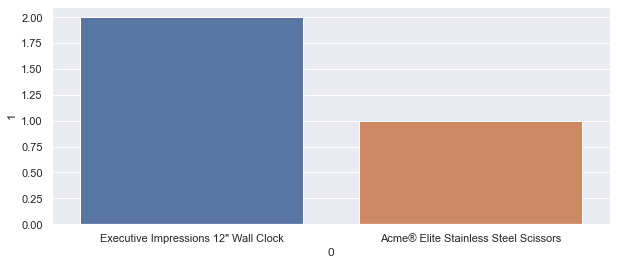

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x=val[0],y=val[1])